In [1]:
#Importing the library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading the dataset
data = 'C:/Users/HP/Documents/workspace/Ml-opzoomcamp/housing.csv'
df = pd.read_csv(data)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.shape

(20640, 10)

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)

In [9]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [10]:
df['ocean_proximity'] = df['ocean_proximity'].str.replace(' ', '_').str.lower()

In [11]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/ df['total_rooms']
df['population_per_household'] = df['population']/ df['households']

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,inland,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,inland,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,inland,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,inland,5.329513,0.219892,2.123209


# QUESTION 1

- **What is the most frequent observation (mode) for the column ocean_proximity?**

**Options:**

- **NEAR BAY**

- **<1H OCEAN**

- **INLAND**

- **NEAR OCEAN**


**Split the data**


- **Split your data in train/val/test sets, with 60%/20%/20% distribution.**


- **Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.**


- **Make sure that the target value (median_house_value) is not in your dataframe**

In [13]:
df['ocean_proximity'].mode()

0    <1h_ocean
dtype: object

 **<1H OCEAN is the most frequent observation from the column  Ocean_proximity**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [16]:
len(df_full_train), len(df_test)

(16512, 4128)

In [17]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [18]:
len(df_train), len(df_test), len(df_val)

(12384, 4128, 4128)

In [19]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [20]:
y_train = df_train['median_house_value'].values
y_val = df_val['median_house_value'].values
y_test = df_test['median_house_value'].values

In [21]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,241400.0,<1h_ocean,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,500001.0,near_ocean,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,64100.0,inland,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,277200.0,<1h_ocean,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,417000.0,near_ocean,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,154200.0,<1h_ocean,3.748996,0.305838,1.909639
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,146400.0,inland,5.720486,0.171472,3.956597
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,215300.0,<1h_ocean,5.549834,0.182879,3.242525
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,139000.0,<1h_ocean,4.414286,0.229126,2.085714


# Question 2


- **Create the correlation matrix for the numerical features of your train dataset.**


- **In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.**


- **What are the two features that have the biggest correlation in this dataset?**


**Options:**


- **total_bedrooms and households**


- **total_bedrooms and total_rooms**


- **population and households**


- **population_per_household and total_rooms**




# Make median_house_value binary


- **We need to turn the median_house_value variable from numeric into binary.**


- **Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.**

In [22]:
df_train.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.925005,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.044328,-0.034814,0.102320,0.011022
latitude,-0.925005,1.000000,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,-0.144455,0.119118,-0.124507,-0.002301
housing_median_age,-0.099812,0.002477,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,0.106235,-0.181275,0.129456,0.012167
total_rooms,0.036449,-0.025914,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.128442,0.168926,-0.194185,-0.029452
total_bedrooms,0.063840,-0.059730,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.041154,0.010381,0.078094,-0.034301
population,0.091670,-0.100272,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.033653,-0.076210,0.031592,0.064998
households,0.049762,-0.063529,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,0.056161,-0.085832,0.058004,-0.032522
median_income,-0.016426,-0.076805,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.689202,0.394154,-0.616617,-0.000454
median_house_value,-0.044328,-0.144455,0.106235,0.128442,0.041154,-0.033653,0.056161,0.689202,1.000000,0.179062,-0.256201,-0.030561
rooms_per_household,-0.034814,0.119118,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,0.179062,1.000000,-0.500589,0.001801


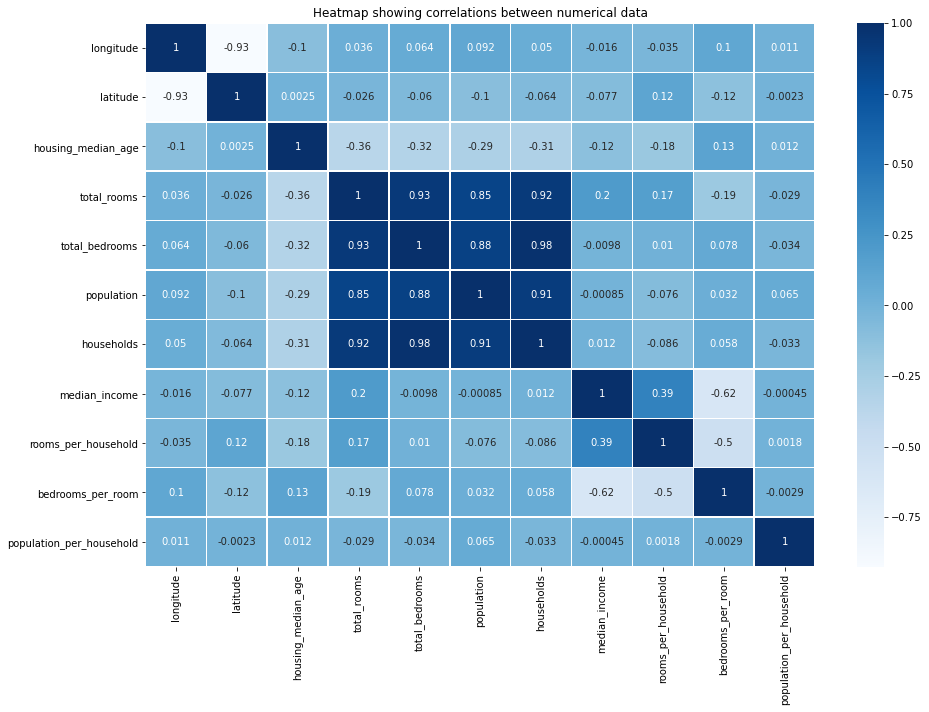

In [43]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_train.corr(),annot=True,linewidths=.5, cmap="Blues")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

**total_bedrooms and households has the biggest correlation from the dataframe**

In [23]:
mean_value = df['median_house_value'].mean()
df_train['above_average'] = (df_train['median_house_value'] > mean_value).astype('int')
df_test['above_average'] = (df_test['median_house_value'] > mean_value).astype('int')
df_val['above_average'] = (df_val['median_house_value'] > mean_value).astype('int')

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [24]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,above_average
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,374.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011,1
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,806.0,10.1357,near_ocean,7.564516,0.130228,2.789082,1
2,-121.62,39.13,41.0,1317.0,309.0,856.0,337.0,1.6719,inland,3.908012,0.234624,2.540059,0
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,915.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016,1
4,-122.30,37.52,38.0,2769.0,387.0,994.0,395.0,5.5902,near_ocean,7.010127,0.139762,2.516456,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,498.0,3.3427,<1h_ocean,3.748996,0.305838,1.909639,0
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,576.0,3.6083,inland,5.720486,0.171472,3.956597,0
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,602.0,3.9844,<1h_ocean,5.549834,0.182879,3.242525,1
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,350.0,4.5112,<1h_ocean,4.414286,0.229126,2.085714,0


# Question 3


- **Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.**


- **What is the value of mutual information?**


- **Round it to 2 decimal digits using round(score, 2)**


**Options:**

- **0.26**


- **0**


- **0.10**


- **0.16**

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 12384 non-null  float64
 1   latitude                  12384 non-null  float64
 2   housing_median_age        12384 non-null  float64
 3   total_rooms               12384 non-null  float64
 4   total_bedrooms            12384 non-null  float64
 5   population                12384 non-null  float64
 6   households                12384 non-null  float64
 7   median_income             12384 non-null  float64
 8   ocean_proximity           12384 non-null  object 
 9   rooms_per_household       12384 non-null  float64
 10  bedrooms_per_room         12384 non-null  float64
 11  population_per_household  12384 non-null  float64
 12  above_average             12384 non-null  int32  
dtypes: float64(11), int32(1), object(1)
memory usage: 1.2+ MB


In [26]:
df_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'above_average'],
      dtype='object')

In [27]:
categorical_val = df_train['ocean_proximity']

In [28]:
from sklearn.metrics import mutual_info_score

In [29]:
round(mutual_info_score(df_train.above_average, df_train.ocean_proximity),2)

0.1

# Question 4


- **Now let's train a logistic regression**


- **Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.**


- **Fit the model on the training dataset.**


- **To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:**


- **model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)**


- **Calculate the accuracy on the validation dataset and round it to 2 decimal digits.**


**Options:**

- **0.60**


- **0.72**


- **0.84**


- **0.95**

In [30]:
y_train = df_train['above_average'].values
y_val = df_val['above_average'].values
y_test = df_test['above_average'].values

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [62]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score

In [32]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)


val_dict = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(val_dict)
X_val = dv.transform(val_dict)


In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [35]:
round(model.score(X_val, y_val), 2)

0.84

# Question 5


- **Let's find the least useful feature using the feature elimination technique.**


- **Train a model with all these features (using the same parameters as in Q4).**


- **Now exclude each feature from this set and train a model without it. Record the accuracy for each model.**


- **For each feature, calculate the difference between the original accuracy and the accuracy without the feature.**


- **Which of following feature has the smallest difference?**


- **total_rooms**


- **total_bedrooms**


- **population**


- **households**


- **note: the difference doesn't have to be positive**

In [54]:
train_dict = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)


val_dict = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(val_dict)
X_val = dv.transform(val_dict)


model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

Train_with_feature = round(model.score(X_val, y_val), 3)
Train_with_feature

0.836

In [37]:
new_total_rooms = df_train.drop(columns= 'total_rooms')
new_total_bedrooms = df_train.drop(columns= 'total_bedrooms')
new_population = df_train.drop(columns= 'population')
new_households = df_train.drop(columns= 'households')

In [38]:
new_total_rooms

,longitude,latitude,housing_median_age,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,381.0,1404.0,374.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,794.0,2248.0,806.0,10.1357,near_ocean,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,309.0,856.0,337.0,1.6719,inland,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,924.0,1884.0,915.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,387.0,994.0,395.0,5.5902,near_ocean,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,571.0,951.0,498.0,3.3427,<1h_ocean,3.748996,0.305838,1.909639
12380,-121.34,38.04,16.0,565.0,2279.0,576.0,3.6083,inland,5.720486,0.171472,3.956597
12381,-116.99,32.74,18.0,611.0,1952.0,602.0,3.9844,<1h_ocean,5.549834,0.182879,3.242525
12382,-117.87,33.84,16.0,354.0,730.0,350.0,4.5112,<1h_ocean,4.414286,0.229126,2.085714


In [39]:
new_households

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-119.67,34.43,39.0,1467.0,381.0,1404.0,2.3681,<1h_ocean,3.922460,0.259714,3.754011
1,-118.32,33.74,24.0,6097.0,794.0,2248.0,10.1357,near_ocean,7.564516,0.130228,2.789082
2,-121.62,39.13,41.0,1317.0,309.0,856.0,1.6719,inland,3.908012,0.234624,2.540059
3,-118.63,34.24,9.0,4759.0,924.0,1884.0,4.8333,<1h_ocean,5.201093,0.194158,2.059016
4,-122.30,37.52,38.0,2769.0,387.0,994.0,5.5902,near_ocean,7.010127,0.139762,2.516456
...,...,...,...,...,...,...,...,...,...,...,...
12379,-118.29,33.79,16.0,1867.0,571.0,951.0,3.3427,<1h_ocean,3.748996,0.305838,1.909639
12380,-121.34,38.04,16.0,3295.0,565.0,2279.0,3.6083,inland,5.720486,0.171472,3.956597
12381,-116.99,32.74,18.0,3341.0,611.0,1952.0,3.9844,<1h_ocean,5.549834,0.182879,3.242525
12382,-117.87,33.84,16.0,1545.0,354.0,730.0,4.5112,<1h_ocean,4.414286,0.229126,2.085714


In [41]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [69]:
# Encoding categorical variable
dv = DictVectorizer(sparse=False)
train_dict = new_total_rooms.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

# Instantiate Logistic Regression
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
# Fit model
model.fit(X_train, y_train)

# Model accuracy score
new_total_rooms_score = round(accuracy_score(y_val, model.predict(X_val)), 3)
new_total_rooms_score

0.836

In [68]:
train_dict = new_total_bedrooms.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)


val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

new_total_bedrooms_score = round(accuracy_score(y_val, model.predict(X_val)), 3)
new_total_bedrooms_score

0.837

In [67]:
train_dict = new_population.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)


val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

new_population_score =round(accuracy_score(y_val, model.predict(X_val)), 3)
new_population_score

0.826

In [66]:
train_dict = new_households.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)


val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

model.fit(X_train, y_train)

new_household_score = round(accuracy_score(y_val, model.predict(X_val)), 3)
new_household_score

0.834

In [61]:
diff_new_total_rooms = Train_with_feature - new_total_rooms_score
diff_new_total_bedroom = Train_with_feature - new_total_bedrooms_score
diff_new_total_population = Train_with_feature - new_population_score
diff_new_household = Train_with_feature - new_household_score

print(f"The difference between original accuracy and the accuracy without the feature total_rooms is {diff_new_total_rooms}")
print(f"The difference between original accuracy and the accuracy without the feature total_bedrooms is {diff_new_total_bedroom}")
print(f"The difference between original accuracy and the accuracy without the feature population is {diff_new_total_population}")
print(f"The difference between original accuracy and the accuracy without the feature households is {diff_new_household}")

The difference between original accuracy and the accuracy without the feature total_rooms is 0.0
The difference between original accuracy and the accuracy without the feature total_bedrooms is -0.0010000000000000009
The difference between original accuracy and the accuracy without the feature population is 0.010000000000000009
The difference between original accuracy and the accuracy without the feature households is 0.0020000000000000018


**Total Bedroom is the smallest**

# Question 6


- **For this question, we'll see how to use a linear regression model from Scikit-Learn**


- **We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.**


- **Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.**


- **This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]**


- **Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.**


- **If there are multiple options, select the smallest alpha.**

**Options:**

- **0**


- **0.01**


- **0.1**


- **1**


- **10**

In [73]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [70]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


y_train = np.log1p(df_train['median_house_value']).values
y_val = np.log1p(df_val['median_house_value']).values
y_test = np.log1p(df_test['median_house_value']).values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [71]:
dv = DictVectorizer(sparse=False)
train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [72]:
alpha_para = [0, 0.01, 0.1, 1, 10]

In [81]:
for c in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=c,solver="sag", random_state=42)
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    rmse =np.sqrt(mean_squared_error(y_val, y_pred))

    

    
    
    print(c, round(rmse, 3))

0 0.524
0.01 0.524
0.1 0.524
1 0.524
10 0.524
